# Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 4.8 MB/s eta 0:00:00
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


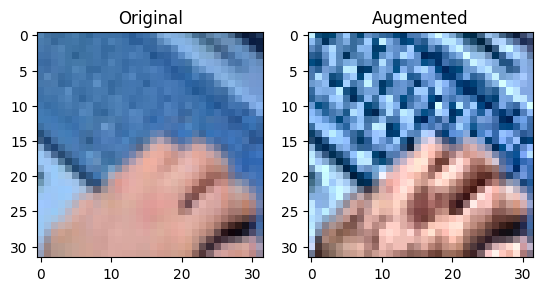

In [1]:
# install & import lib
!pip install -q albumentations==1.3.1
import albumentations as A
from albumentations.pytorch import ToTensorV2
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# load CIFAR-100
(x_img, y_img), _ = tf.keras.datasets.cifar100.load_data(label_mode='fine')
x_img = x_img.astype("uint8")

# albumentations transform
img_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.4),
    A.CLAHE(p=0.2),
])

# show original vs augmented
img = x_img[10]
aug = img_transform(image=img)['image']

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(aug)
plt.title("Augmented")
plt.show()

# Text

In [5]:
# install & import lib
!pip install -q nlpaug
import nltk
nltk.download('all')
import nlpaug.augmenter.word as naw

txt = "This language model is versatile and reliable."

# synonym replacement
aug = naw.SynonymAug(aug_p=0.3)
print("Original:", txt)
print("Augmented:", aug.augment(txt))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root

Original: This language model is versatile and reliable.
Augmented: ['This speech model is various and dependable.']


# TimeSeries

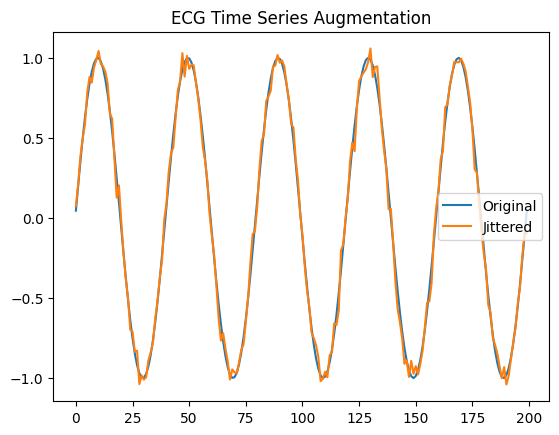

In [6]:
# import lib
import numpy as np
import matplotlib.pyplot as plt

def generate_ecg_data(n=1000, length=200):
    t = np.linspace(0, 1, length)
    return np.array([np.sin(2*np.pi*5*t + np.random.rand()) for _ in range(n)])

def apply_jitter(ts, noise=0.05):
    return ts + np.random.normal(0, noise, ts.shape)

# generate and plot
raw = generate_ecg_data(1)[0]
aug = apply_jitter(raw.reshape(1, -1))[0]

plt.plot(raw, label="Original")
plt.plot(aug, label="Jittered")
plt.legend()
plt.title("ECG Time Series Augmentation")
plt.show()

# Tabular Data

In [7]:
# install & import lib
!pip install -q imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv").dropna()
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# apply SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_aug, y_aug = SMOTE().fit_resample(X_train, y_train)

# train the model
model = GradientBoostingClassifier().fit(X_aug, y_aug)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        17
           1       0.86      0.83      0.84        29

    accuracy                           0.80        46
   macro avg       0.79      0.80      0.79        46
weighted avg       0.81      0.80      0.81        46



# Document

100%|██████████| 562M/562M [00:28<00:00, 20.0MB/s]


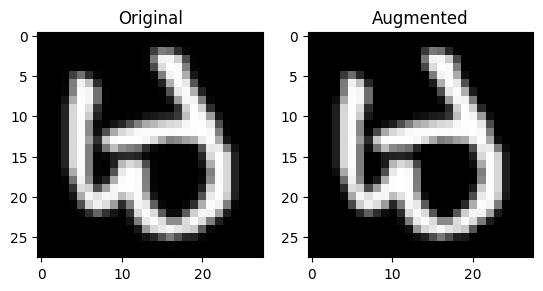

In [12]:
# import lib
from torchvision.datasets import EMNIST
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader
import albumentations as A
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# dataset
ds = EMNIST(root='./data', split='letters', train=True, download=True)

# transform
doc_aug = A.Compose([
    A.Rotate(limit=15),
    A.RandomBrightnessContrast(),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2()
])

# apply
img, _ = ds[20]
aug_img = doc_aug(image=np.array(img))['image'].numpy().squeeze()

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(aug_img, cmap='gray')
plt.title("Augmented")
plt.show()

# Speech

In [13]:
# install & import lib
!pip install -q torchaudio tensorflow tensorflow_datasets pydub
import torchaudio
import tensorflow_datasets as tfds
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random

# load & preprocess speech data from TFDS
ds_train, ds_info = tfds.load('speech_commands', split='train[:2%]', with_info=True, as_supervised=True)
class_names = ds_info.features['label'].names

class SpeechDataset(Dataset):
    def __init__(self, tfds_data, target_len=16000):
        self.samples = list(tfds_data)
        self.target_len = target_len

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        audio, label = self.samples[idx]
        waveform = torch.tensor(audio.numpy().squeeze()).float()
        label = int(label.numpy())

        if len(waveform) < self.target_len:
            pad = self.target_len - len(waveform)
            waveform = torch.nn.functional.pad(waveform, (0, pad))
        else:
            waveform = waveform[:self.target_len]

        return waveform, label

train_dataset = SpeechDataset(ds_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# define augmentation pipeline
augment = torch.nn.Sequential(
    torchaudio.transforms.Vol(gain=random.uniform(-6, 6), gain_type='db'),
    torchaudio.transforms.FrequencyMasking(freq_mask_param=20),
    torchaudio.transforms.TimeMasking(time_mask_param=40)
)


# define 1D CNN model
class WaveCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=5), nn.ReLU(), nn.MaxPool1d(2),
            nn.Conv1d(16, 32, kernel_size=5), nn.ReLU(), nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv(x)
        return self.fc(x.squeeze(-1))


# training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = WaveCNN(num_classes=len(class_names)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(3):
    model.train()
    total_loss = 0
    for waveforms, labels in train_loader:
        waveforms, labels = waveforms.to(device), labels.to(device)
        waveforms = augment(waveforms.unsqueeze(1)).squeeze(1)

        outputs = model(waveforms)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1} | Avg Loss: {avg_loss:.4f}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.C4Y36N_0.0.3/speech_commands-train.tfrecord*...…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.C4Y36N_0.0.3/speech_commands-validation.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/speech_commands/incomplete.C4Y36N_0.0.3/speech_commands-test.tfrecord*...:…

Dataset speech_commands downloaded and prepared to /root/tensorflow_datasets/speech_commands/0.0.3. Subsequent calls will reuse this data.
Epoch 1 | Avg Loss: 1.8827
Epoch 2 | Avg Loss: 1.5411
Epoch 3 | Avg Loss: 1.5388
